# Problem Statement

In this case study, we focus to perform EDA using visualizations and statistics summaries on loan application data. We need to find out what factors affect an applicant to be a defaulter or non-defaulter.

# Approach

For EDA we will try to follow the bolow steps:
1) Import Modules

2) Read the dataset

3) Data Cleaning

    On previous_application dataframe
    
        a) Missing value handling
            i) identifying missing data
            ii) Dropping missing data
        b) Outlier Analysis
    On application_data dataframe
    
        a) Missing value handling
            i) identifying missing data
            ii) Dropping missing data
    c) Data Imbalance
    
4) Analysis of different variables in segments :-

    a) Segment 1
    
    b) Segment 2
    
    c) Segment 3
    
    d) Segment 4
    
    e) Segment 5
 
5) Correlation

    a) Top 5 correlation for defaulters
    
    b) Top 5 correlations for non-defaulters
    
6) Summary

# 1) Import Modules

Let's import libraries for EDA

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")


Import our dataset as datframes using pandas library

# 2) Read Datasets

In [2]:
# reading application_data.csv
application_df = pd.read_csv('project 6 file 3.csv')
# reading previous_application.csv
prev_ap_df = pd.read_csv('project 6 file 1.csv')

In [3]:
print(application_df.shape)
print(prev_ap_df.shape)

(307511, 122)
(1670214, 37)


Lets check all features and it's datatypes

In [4]:
application_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [5]:
prev_ap_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

### Insights
<ol>
    <li><p>prev_ap_df contains 37 features and 1670214 rows.</p>
    <p>Out of which 15 are float64, 6 are int64 and 16 are object datatype.</p></li>
    <li><p>application_df contains 121 features, 1 target variable, and 307511 rows.</p>
    <p>Out of which 65 are float64, 41 are integer, 16 are object datatype</p></li>
</ol>

In [6]:
# We will try to store lists of columns that are common in both dataframes and additional in any of them 
additional_feat = []
common_feat = []

for col in application_df.columns:
    if col in prev_ap_df.columns:
        common_feat.append(col)
    else:
        additional_feat.append(col)
        
print(len(additional_feat))
print(len(common_feat))
print(common_feat)

114
8
['SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START']


### Insights
<ol>
    <li><p>There are 8 columns that are present in both dataframes</p></li>
    <li><p>SK_ID_CURR is the unique identifyer in both dataframe that we will use to merge both dataframes.</p></li>
</ol>

# 3) Data Cleaning

## Firstly I will try to perform data cleaning on the 'prev_ap_df'

### a) Missing value handling

i) Identifying Missing Data

In [7]:
# define a function that has one arguement as dataframe
def missingdata_percentage(df):
    # create an empty dataframe with two columns
    missing = pd.DataFrame(columns=['category','percentage'])
    # iterate through all the columns of dataframe
    for col in df.columns:
        # a conditional statement that only passes those columns that have at least 1 missing value
        if df[col].isna().values.any():
            # calulate the percentage of null values in that particular column
            percentage = 100*df[col].isna().sum()/df.shape[0]
            # append that column into to empty dataframe we created earlier
            missing = missing.append({'category' : col, 'percentage' : percentage}, ignore_index=True)
    # return the dataframe we created
    return missing

In [8]:
missingdata_prev = missingdata_percentage(prev_ap_df)

In [9]:
missingdata_prev.sort_values('percentage', ascending=False)

,category,percentage
5,RATE_INTEREST_PRIMARY,99.643698
6,RATE_INTEREST_PRIVILEGED,99.643698
2,AMT_DOWN_PAYMENT,53.636480
4,RATE_DOWN_PAYMENT,53.636480
7,NAME_TYPE_SUITE,49.119754
10,DAYS_FIRST_DRAWING,40.298129
11,DAYS_FIRST_DUE,40.298129
12,DAYS_LAST_DUE_1ST_VERSION,40.298129
13,DAYS_LAST_DUE,40.298129
14,DAYS_TERMINATION,40.298129


### Insights

There are 16 features in prev_app_df that have missing values.
<ul>
<li>Permanently dropping the features (RATE_INTEREST_PRIMARY and RATE_INTEREST_PRIVILEGED) as 99% data is missing.</li>

<li>Dropping rows containing missing values for the features(AMT_CREDIT and PRODUCT_COMBINATION) for very low % of missing data.</li>

<li>Dropping entries would not cause impact the analysis as percentage of missing value is very low (~2%).</li>
</ul>

ii) Dropping missing data

In [10]:
prev_ap_df.drop(['RATE_INTEREST_PRIMARY','RATE_INTEREST_PRIVILEGED'], axis=1, inplace=True)
prev_ap_df.dropna(subset=['AMT_CREDIT','PRODUCT_COMBINATION'], inplace=True)

#Checking the remaining columns
prev_ap_df

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1670209,2300464,352015,Consumer loans,14704.290,267295.5,311400.0,0.0,267295.5,WEDNESDAY,12,...,Furniture,30.0,low_normal,POS industry with interest,365243.0,-508.0,362.0,-358.0,-351.0,0.0
1670210,2357031,334635,Consumer loans,6622.020,87750.0,64291.5,29250.0,87750.0,TUESDAY,15,...,Furniture,12.0,middle,POS industry with interest,365243.0,-1604.0,-1274.0,-1304.0,-1297.0,0.0
1670211,2659632,249544,Consumer loans,11520.855,105237.0,102523.5,10525.5,105237.0,MONDAY,12,...,Consumer electronics,10.0,low_normal,POS household with interest,365243.0,-1457.0,-1187.0,-1187.0,-1181.0,0.0
1670212,2785582,400317,Cash loans,18821.520,180000.0,191880.0,NaN,180000.0,WEDNESDAY,9,...,XNA,12.0,low_normal,Cash X-Sell: low,365243.0,-1155.0,-825.0,-825.0,-817.0,1.0


### B) Outliers Analysis

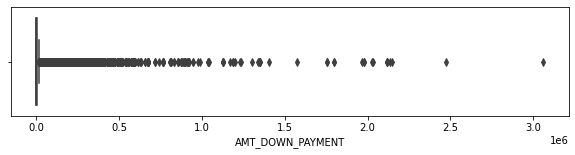

In [11]:
plt.figure(figsize=(10,2))
sns.boxplot(prev_ap_df['AMT_DOWN_PAYMENT'])
plt.show()

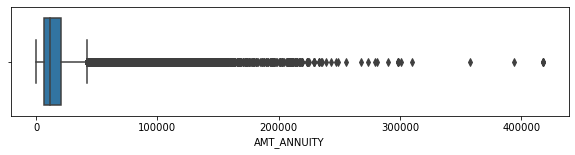

In [12]:
plt.figure(figsize=(10,2))
sns.boxplot(prev_ap_df['AMT_ANNUITY'])
plt.show()

In [13]:
import pandas as pd

def remove_outliers(df, column):
    """
    Removes outliers outside of the 99th percentile in a Pandas DataFrame for a given column.
    
    Parameters:
        df (Pandas DataFrame): The DataFrame containing the data.
        column (str): The name of the column to remove outliers for.
    
    Returns:
        The DataFrame with outliers removed.
    """
    
    # calculate the 99th percentile
    perc_99 = df[column].quantile(0.99)
    

    # remove outliers outside the IQR
    df = df[~(df[column] > perc_99)]

    return df

In [14]:
prev_ap_df = remove_outliers(prev_ap_df, 'AMT_DOWN_PAYMENT')

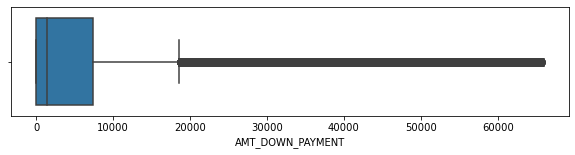

In [15]:
plt.figure(figsize=(10,2))
sns.boxplot(prev_ap_df['AMT_DOWN_PAYMENT'])
plt.show()

In [16]:
prev_ap_df = remove_outliers(prev_ap_df, 'AMT_ANNUITY')

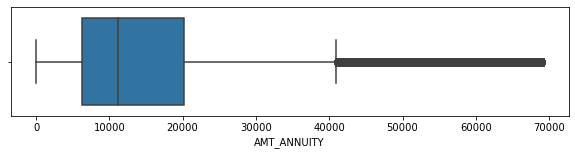

In [17]:
plt.figure(figsize=(10,2))
sns.boxplot(prev_ap_df['AMT_ANNUITY'])
plt.show()

# Now, I will try to perform data cleaning on the 'application_df'

### a) Missing value handling

i) Identifying Missing Data

In [18]:
# We will use missingdata_percentage() function that we created earlier
missingdata_application_df = missingdata_percentage(application_df)

In [19]:
missingdata_application_df.sort_values('percentage', ascending=False)

,category,percentage
41,COMMONAREA_MEDI,69.872297
13,COMMONAREA_AVG,69.872297
27,COMMONAREA_MODE,69.872297
49,NONLIVINGAPARTMENTS_MEDI,69.432963
35,NONLIVINGAPARTMENTS_MODE,69.432963
...,...,...
7,EXT_SOURCE_2,0.214626
1,AMT_GOODS_PRICE,0.090403
0,AMT_ANNUITY,0.003902
5,CNT_FAM_MEMBERS,0.000650


In [20]:
missingdata_application_df[missingdata_application_df['percentage']<1]

,category,percentage
0,AMT_ANNUITY,0.003902
1,AMT_GOODS_PRICE,0.090403
2,NAME_TYPE_SUITE,0.420148
5,CNT_FAM_MEMBERS,0.000650
7,EXT_SOURCE_2,0.214626
56,OBS_30_CNT_SOCIAL_CIRCLE,0.332021
57,DEF_30_CNT_SOCIAL_CIRCLE,0.332021
58,OBS_60_CNT_SOCIAL_CIRCLE,0.332021
59,DEF_60_CNT_SOCIAL_CIRCLE,0.332021
60,DAYS_LAST_PHONE_CHANGE,0.000325


### Insights

There are 16 features in prev_app_df that have missing values.
<ul>

<li>Dropping rows containing missing values for the features for <1% of missing data.</li>

<li>Dropping entries would not cause impact the analysis as percentage of missing value is very low (~2%).</li>
</ul>

ii) Dropping missing data

In [21]:
application_df.dropna(subset=['AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'CNT_FAM_MEMBERS', 'EXT_SOURCE_2', 'OBS_30_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE'], inplace=True)

#Checking the remaining columns
application_df

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


## c) Checking Data Imbalance

for checking imbalance in data we need to merge both dataframes and clean it jut as we have cleaned both the datasets separately

In [22]:
# Merging only required columns of application_data with previous_application_data

prev_ap_merged = pd.merge(application_df[['SK_ID_CURR', 'TARGET']], prev_ap_df, how='left', on=['SK_ID_CURR'])
print(prev_ap_merged.shape)

(1404179, 36)


In [23]:
prev_ap_merged = remove_outliers(prev_ap_merged, 'AMT_DOWN_PAYMENT')
prev_ap_merged = remove_outliers(prev_ap_merged, 'AMT_ANNUITY')
print(prev_ap_merged.shape)

(1388267, 36)


In [24]:
prev_ap_merged.describe()

,SK_ID_CURR,TARGET,SK_ID_PREV,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.388267e+06,1.388267e+06,1.371700e+06,1.066537e+06,1.371700e+06,1.371700e+06,646928.000000,1.054234e+06,1.371700e+06,1.371700e+06,646928.000000,1.371700e+06,1.371700e+06,1.066542e+06,825220.000000,825220.000000,825220.000000,825220.000000,825220.000000,825220.000000
mean,2.784320e+05,8.702505e-02,1.922904e+06,1.452031e+04,1.564674e+05,1.775130e+05,5071.408513,2.036190e+05,1.246973e+01,9.963768e-01,0.075369,-8.835551e+02,3.130396e+02,1.585517e+01,341569.289099,13859.406067,34283.481966,76815.867727,82618.287087,0.327315
std,1.027883e+05,2.818719e-01,5.326533e+05,1.156755e+04,2.481789e+05,2.741488e+05,7987.331198,2.656373e+05,3.329384e+00,6.008424e-02,0.099251,7.877036e+02,7.797789e+03,1.446115e+01,90062.213881,72536.846349,107580.829373,149819.845989,153717.777294,0.469234
min,1.000020e+05,0.000000e+00,1.000001e+06,0.000000e+00,0.000000e+00,0.000000e+00,-0.900000,0.000000e+00,0.000000e+00,0.000000e+00,-0.000015,-2.922000e+03,-1.000000e+00,0.000000e+00,-2922.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000,0.000000
25%,1.893400e+05,0.000000e+00,1.461701e+06,6.126255e+03,1.818000e+04,2.384100e+04,0.000000,4.855590e+04,1.000000e+01,1.000000e+00,0.000000,-1.327000e+03,-1.000000e+00,6.000000e+00,365243.000000,-1648.000000,-1261.000000,-1331.000000,-1284.000000,0.000000
50%,2.789110e+05,0.000000e+00,1.922842e+06,1.087384e+04,6.750000e+04,7.695000e+04,1539.000000,1.043100e+05,1.200000e+01,1.000000e+00,0.049659,-5.810000e+02,4.000000e+00,1.200000e+01,365243.000000,-835.000000,-366.000000,-544.000000,-503.000000,0.000000
75%,3.674500e+05,0.000000e+00,2.384084e+06,1.939279e+04,1.777500e+05,1.978200e+05,7164.000000,2.250000e+05,1.500000e+01,1.000000e+00,0.108909,-2.690000e+02,8.500000e+01,2.400000e+01,365243.000000,-408.000000,136.000000,-74.000000,-41.000000,1.000000
max,4.562550e+05,1.000000e+00,2.845381e+06,5.805932e+04,3.511305e+06,3.511305e+06,45000.000000,3.511305e+06,2.300000e+01,1.000000e+00,0.831411,-1.000000e+00,4.000000e+06,8.400000e+01,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


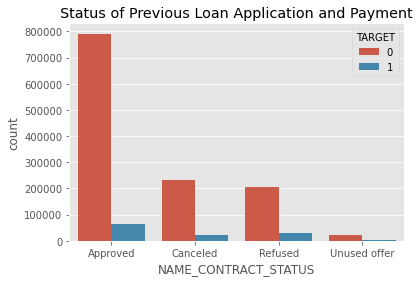

In [25]:
plt.style.use("ggplot")
plt.title("Status of Previous Loan Application and Payment")
sns.countplot(prev_ap_merged['NAME_CONTRACT_STATUS'], hue=prev_ap_merged['TARGET'])
plt.show()

In [26]:
# Percentage of previously approved loan applicants that defaulted in current loan

total_approved = prev_ap_merged[prev_ap_merged['NAME_CONTRACT_STATUS'] == "Approved"].shape[0]
default_approved = prev_ap_merged[(prev_ap_merged['TARGET'] == 1) & (prev_ap_merged['NAME_CONTRACT_STATUS'] == "Approved")].shape[0]

print("Percentage of previously approved loan applicants that defaulted in current loan : {}".format(default_approved/total_approved*100))

Percentage of previously approved loan applicants that defaulted in current loan : 7.678348657899435


In [27]:
total_refused = prev_ap_merged[prev_ap_merged['NAME_CONTRACT_STATUS'] == "Refused"].shape[0]
nondefault_refused = prev_ap_merged[(prev_ap_merged['TARGET'] == 0) & (prev_ap_merged['NAME_CONTRACT_STATUS'] == "Refused")].shape[0]

print("Percentage of previously refused loan applicants that were able to pay current loan : {}".format(nondefault_refused/total_refused*100))

Percentage of previously refused loan applicants that were able to pay current loan : 87.86236584753729


#### Insights :

The applicants whose previous loans were approved are more likely to pay current loan in time, than the applicants whose previous loans were rejected.

7.6% of the previously approved loan applicants that defaulted in current loan

87.8 % of the previously refused loan applicants that were able to pay current loan

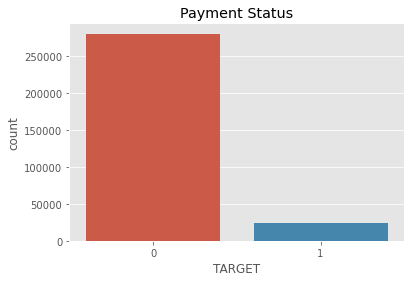

In [28]:
plt.title("Payment Status")
sns.countplot(application_df['TARGET'])
plt.show()

This data is highly imbalanced as number of defaulter is very less in total population.

In [29]:
non_default  = application_df[application_df["TARGET"] == 0]
default  = application_df[application_df["TARGET"] == 1]

print("No. of defaulters: ", default.shape[0])
print("No. of non-defaulters: ", non_default.shape[0])

No. of defaulters:  24667
No. of non-defaulters:  279864


In [30]:
print("Percentage of defaulters: ", default.shape[0]*100/(default.shape[0]+non_default.shape[0]))

Percentage of defaulters:  8.099996387888261


#### Insights :
This data is highly imbalanced as number of defaulter is very less in total population. 
Data Imbalance Ratio

Defaulter : Non-Defaulter = 8 : 92 = 2 : 23

# 4) Analysis of diffrent variables in segments

### Segment 1 :- Region based analysis

In [31]:
start_idx = application_df.columns.get_loc('REG_REGION_NOT_LIVE_REGION')
end_idx = application_df.columns.get_loc('LIVE_CITY_NOT_WORK_CITY')

region_df = application_df.iloc[:, start_idx:end_idx+1]

In [32]:
region_df['REGION_RATING_CLIENT'] = application_df['REGION_RATING_CLIENT']
region_df['REGION_RATING_CLIENT_W_CITY'] = application_df['REGION_RATING_CLIENT_W_CITY']
region_df["TARGET"] = application_df["TARGET"]

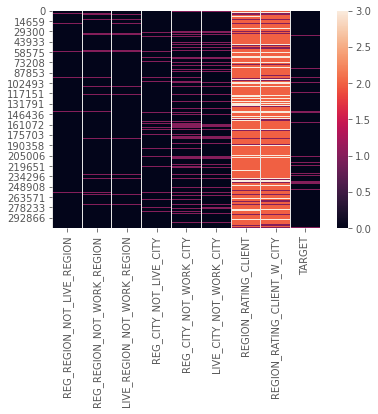

In [33]:
sns.heatmap(region_df)
plt.show()

#### Insights:
<ul>
<li>All the features are labeled as 0 and 1.</li>
<li>REG_REGION_NOT_LIVE_REGION mostly contains 0, hence it can be removed</li>
<li>REG_REGION_NOT_WORK_REGION, LIVE_REGION_NOT_WORK_REGION columns are identical, hence one of them can be removed</li>
<li>REG_CITY_NOT_WORK_CITY, LIVE_CITY_NOT_WORK_CITY columns are identical, hence one of them can be removed.</li>
</ul>

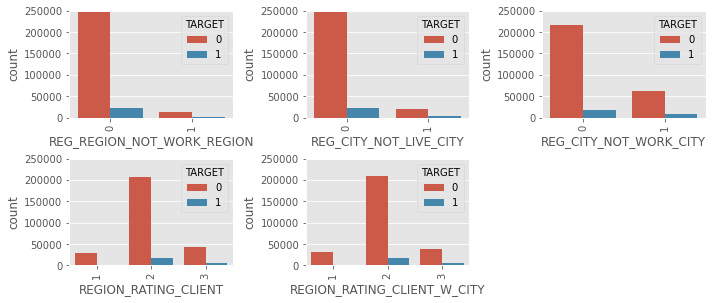

In [34]:
fig=plt.subplots(figsize=(10, 10))

for i, j in enumerate(['REG_REGION_NOT_WORK_REGION','REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY','REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY']):
    plt.subplot(5, 3, i+1, ylim=(0, 250000))
    plt.subplots_adjust(hspace = 1.0)
    sns.countplot(application_df[j], hue=application_df["TARGET"])
    plt.xticks(rotation=90)
    plt.tight_layout()

#### Insights:
</ul>
<li>Defaulter rate is highest when REG_REGION_NOT_WORK_REGION=0 i.e. permanent address and working address is same</li>

</ul>

### Segment 2 :- Based on contact

In [35]:
contact_df = application_df[['FLAG_MOBIL','FLAG_EMP_PHONE','FLAG_WORK_PHONE','FLAG_CONT_MOBILE','FLAG_PHONE','FLAG_EMAIL','DAYS_LAST_PHONE_CHANGE', 'TARGET']]
contact_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 304531 entries, 0 to 307510
Data columns (total 8 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   FLAG_MOBIL              304531 non-null  int64  
 1   FLAG_EMP_PHONE          304531 non-null  int64  
 2   FLAG_WORK_PHONE         304531 non-null  int64  
 3   FLAG_CONT_MOBILE        304531 non-null  int64  
 4   FLAG_PHONE              304531 non-null  int64  
 5   FLAG_EMAIL              304531 non-null  int64  
 6   DAYS_LAST_PHONE_CHANGE  304531 non-null  float64
 7   TARGET                  304531 non-null  int64  
dtypes: float64(1), int64(7)
memory usage: 29.0 MB


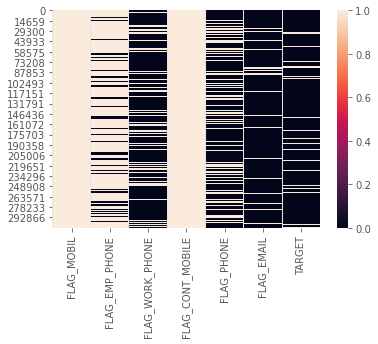

In [36]:
plt.figure()
sns.heatmap(contact_df.drop('DAYS_LAST_PHONE_CHANGE', axis=1))
plt.show()

#### Insights:

<li>All the features in contact_df are categorical (0 and 1)</li>

<li>As there is no similarity of patterns of TARGET value with the features,

<li>we are assuming the feature are not useful for analysis.</li>

<li>Hence all of these features can be removed.
</ul>

### Segment 3 :- Based on assets owned

In [39]:
application_df[['FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'OWN_CAR_AGE', 'TARGET']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 304531 entries, 0 to 307510
Data columns (total 4 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   FLAG_OWN_CAR     304531 non-null  object 
 1   FLAG_OWN_REALTY  304531 non-null  object 
 2   OWN_CAR_AGE      103619 non-null  float64
 3   TARGET           304531 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 19.7+ MB


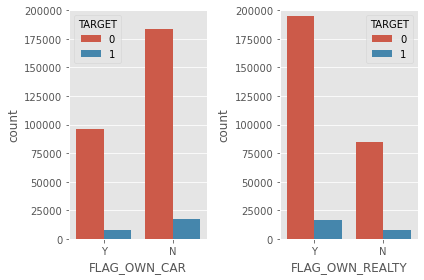

In [40]:
fig = plt.figure()

ax1 = fig.add_subplot(1, 2, 1, ylim=(0,200000))
ax2 = fig.add_subplot(1, 2, 2, ylim=(0,200000))

sns.countplot(application_df['FLAG_OWN_CAR'], hue=application_df['TARGET'], order=['Y','N'], ax=ax1)
sns.countplot(application_df['FLAG_OWN_REALTY'], hue=application_df['TARGET'], order=['Y','N'], ax=ax2)

plt.tight_layout()

plt.show()

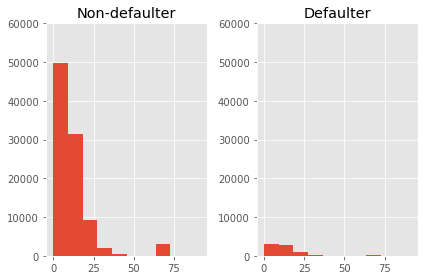

In [41]:
fig = plt.figure()

ax1 = fig.add_subplot(1, 2, 1, ylim=(0,60000), title="Non-defaulter")
ax2 = fig.add_subplot(1, 2, 2, ylim=(0,60000), title="Defaulter")

non_default['OWN_CAR_AGE'].hist(bins=10, ax=ax1)
default['OWN_CAR_AGE'].hist(bins=10, ax=ax2)

plt.tight_layout()

plt.show()

#### Insights :-
<ul>
    <li>Most people between the age of 0 to 25 have cars irrespective of weather they are defaulter or not.</li>
    <li> both target values are similar so this feature can also be dropped.</li>
    <li>People not owning reality and car have a slightly higher default rate than the people who own reality and car.</li>

### Segement 4 :- Based on documents submitted

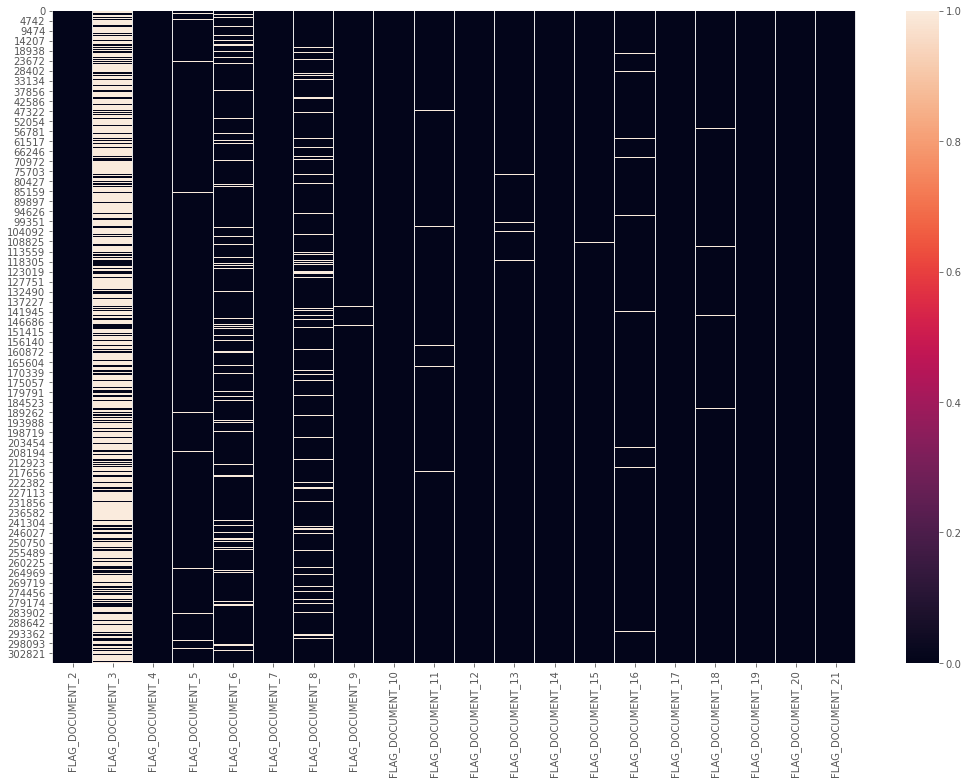

In [42]:
starting_idx = application_df.columns.get_loc("FLAG_DOCUMENT_2")
ending_idx = application_df.columns.get_loc("FLAG_DOCUMENT_21")+1

plt.figure(figsize=(18,12))
sns.heatmap(application_df.iloc[:,starting_idx:ending_idx])
plt.show()

#### Insights :- 
<ul>
    <li>Document 3 has been submitted by almost every applicant.</li>
    <li>We can asssume all other documents except document 3 will provide help in analyzing the data.</li>
</ul>


We will now reconfirm the importance of document 3.

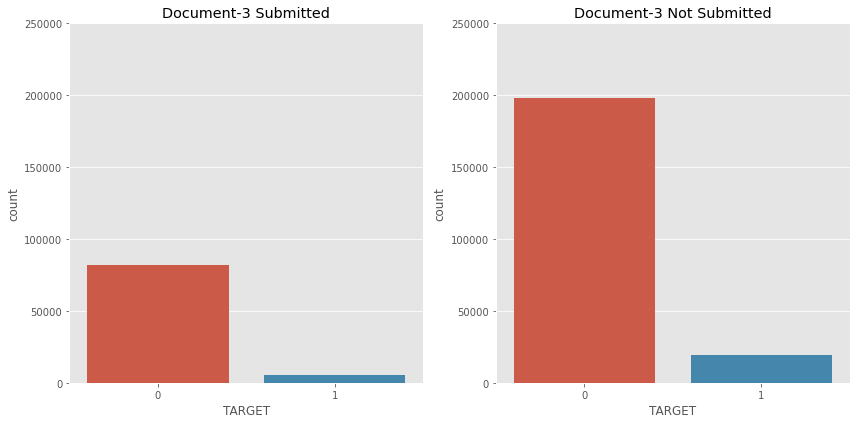

In [43]:
fig = plt.figure(figsize=(12,6))

ax1 = fig.add_subplot(1, 2, 1, ylim=(0,250000), title="Document-3 Submitted")
ax2 = fig.add_subplot(1, 2, 2, ylim=(0,250000), title="Document-3 Not Submitted")

sns.countplot(application_df[application_df["FLAG_DOCUMENT_3"] == 0]["TARGET"], ax=ax1)
sns.countplot(application_df[application_df["FLAG_DOCUMENT_3"] == 1]["TARGET"], ax=ax2)

plt.tight_layout()

plt.show()

Lookig at the bar graph above, document 3 is shpwing similar trends for both defaulters and non-defaulters.

Hence we can drop this column.

### Segment 5 :- Based on education level or occupation

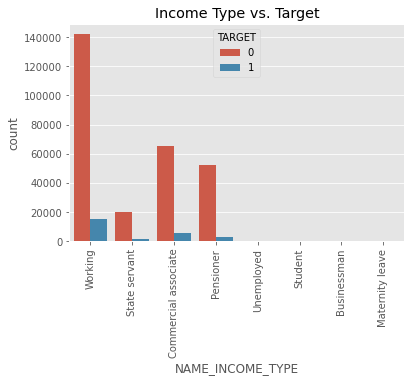

In [44]:
plt.figure()
sns.countplot(application_df['NAME_INCOME_TYPE'], hue=application_df["TARGET"])
plt.xticks(rotation=90)
plt.title("Income Type vs. Target")
plt.show()

In [46]:
def value_wise_defaulter_percentage(df, col):
    new_df = pd.DataFrame(columns=['Value', 'Percentage of Defaulter'])
    
    for value in df[col].unique():
        default_cnt = df[(df[col] == value) & (df.TARGET == 1)].shape[0]
        total_cnt = df[df[col] == value].shape[0]
        new_df = new_df.append({'Value' : value , 'Percentage of Defaulter' : (default_cnt*100/total_cnt)}, ignore_index=True)
    return new_df.sort_values(by='Percentage of Defaulter', ascending=False)

In [47]:
value_wise_defaulter_percentage(application_df,'NAME_INCOME_TYPE')

,Value,Percentage of Defaulter
4,Unemployed,42.105263
7,Maternity leave,40.000000
0,Working,9.620506
2,Commercial associate,7.517586
1,State servant,5.761719
3,Pensioner,5.395598
5,Student,0.000000
6,Businessman,0.000000


In [48]:
value_wise_defaulter_percentage(application_df,'NAME_EDUCATION_TYPE')

,Value,Percentage of Defaulter
3,Lower secondary,10.897098
0,Secondary / secondary special,8.963349
2,Incomplete higher,8.501229
1,Higher education,5.381937
4,Academic degree,1.840491


In [51]:
value_wise_defaulter_percentage(application_df, 'OCCUPATION_TYPE')

ZeroDivisionError: division by zero

In [52]:
application_df['OCCUPATION_TYPE'].isnull().value_counts()

False    209096
True      95435
Name: OCCUPATION_TYPE, dtype: int64

In [53]:
application_df['OCCUPATION_TYPE'].value_counts()

Laborers                 54730
Sales staff              31790
Core staff               27263
Managers                 21114
Drivers                  18456
High skill tech staff    11261
Accountants               9698
Medicine staff            8459
Security staff            6667
Cooking staff             5898
Cleaning staff            4615
Private service staff     2629
Low-skill Laborers        2077
Waiters/barmen staff      1335
Secretaries               1293
Realty agents              742
HR staff                   558
IT staff                   511
Name: OCCUPATION_TYPE, dtype: int64

In [54]:
# Imputing missing value for OCCUPATION TYPE as "Unknown"

application_df['OCCUPATION_TYPE'].fillna("Unknown", inplace=True)

In [55]:
value_wise_defaulter_percentage(application_df, 'OCCUPATION_TYPE')

,Value,Percentage of Defaulter
14,Low-skill Laborers,17.284545
13,Waiters/barmen staff,11.385768
5,Drivers,11.367577
11,Security staff,10.754462
0,Laborers,10.608441
8,Cooking staff,10.512038
7,Cleaning staff,9.642470
6,Sales staff,9.635105
15,Realty agents,7.951482
16,Secretaries,7.115236


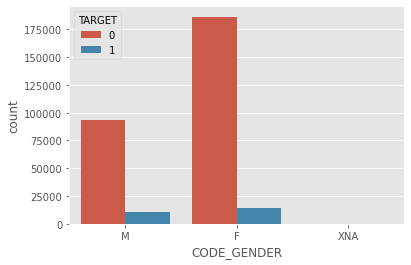

In [56]:
sns.countplot(application_df['CODE_GENDER'], hue=application_df["TARGET"])
plt.show()

In [57]:
value_wise_defaulter_percentage(application_df, 'CODE_GENDER')

,Value,Percentage of Defaulter
0,M,10.191744
1,F,7.014595
2,XNA,0.000000


#### Insights :-
<ul>
    <li>Applicants that are on maternity leave or unemployeed are mst likely to be defaulter.</li>
    <li>Businessmen and studennts have lowest default rate (zero).</li>
    <li>Applicants that have "Lower secondary" education are most likely to be defaulter as compared to others.</li>
    <li>Low skilled labourers have very high rate of defaulters.</li>
    <li> Although there are more female applicants but male aplicants are more likely to be defaulter than famale applicants</li>

# 5) Correlation

### a) Top 5 correlation for defaulters

In [61]:
defaulter_corr = default.corr()
round(defaulter_corr, 2)

corr_list = defaulter_corr.unstack()

# Listing the correlations in pair sorted in descending order
corr_list.sort_values(ascending=False).drop_duplicates().head(6)

SK_ID_CURR                SK_ID_CURR                  1.000000
OBS_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE    0.998286
BASEMENTAREA_MEDI         BASEMENTAREA_AVG            0.998205
YEARS_BUILD_MEDI          YEARS_BUILD_AVG             0.998090
COMMONAREA_MEDI           COMMONAREA_AVG              0.998085
NONLIVINGAPARTMENTS_AVG   NONLIVINGAPARTMENTS_MEDI    0.998053
dtype: float64

#### Top 10 Correlations for Defaulters
<ol>
<li>(OBS_60_CNT_SOCIAL_CIRCLE, OBS_30_CNT_SOCIAL_CIRCLE)</li>
<li>(BASEMENTAREA_MEDI, BASEMENTAREA_AVG)</li>
<li>(YEARS_BUILD_MEDI, YEARS_BUILD_AVG)</li>
<li>(COMMONAREA_MEDI, COMMONAREA_AVG)
<li>(NONLININGAPARTMENTS_AVG, NONLININGAPARTMENTS_MEDI)</li>
</ol>

### b) Top 5 correlation for non-defaulters

In [60]:
nondefaulter_corr = non_default.corr()
round(nondefaulter_corr, 2)

nondf_corr_list = nondefaulter_corr.unstack()

# Listing the correlations in pair sorted in descending order
nondf_corr_list.sort_values(ascending=False).drop_duplicates().head(6)

SK_ID_CURR                SK_ID_CURR                  1.000000
YEARS_BUILD_AVG           YEARS_BUILD_MEDI            0.998519
OBS_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE    0.998513
FLOORSMIN_AVG             FLOORSMIN_MEDI              0.997215
FLOORSMAX_MEDI            FLOORSMAX_AVG               0.997032
ENTRANCES_MEDI            ENTRANCES_AVG               0.996910
dtype: float64

#### Top 10 Correlations for Non-Defaulters
<ol>
<li>(YEARS_BUILD_AVG, YEARS_BUILD_MEDI)</li>
<li>(OBS_30_CNT_SOCIAL_CIRCLE, OBS_60_CNT_SOCIAL_CIRCLE)</li>
<li>(FLOORSMIN_AVG, FLOORSMIN_MEDI)</li>
<li>(FLOORSMAX_MEDI, FLOORSMAX_AVG)</li>
<li>(ENTRANCES_MEDI, ENTRANCES_AVG)</li>
</ol>

# 6) Summary

<ol>
<li> This data is highly imbalanced.</li>
    
<li> Based on region : Defaulter rate is highest when permanent address and working address is same.</li>

<li> Based on Contact : Considered 'FLAG_MOBIL','FLAG_EMP_PHONE' etc for this segment. No impact on Target, features can be dropped.</li>

<li> Most of the applicants own realty, most of the applicants do not own cars, people not owning reality and car and have a slightly higher default rate than the people who own reality and car.</li>

<li> Based on Documents : Majority of the applicants did not submit any documents apart from DOCUMENT_3. FLAG_DOCUMENT_3 has similar impact on defaulters and non-defaulters. Hence this column can be dropped.

<li>Applicants that are either low skilled labour or have attained lower secondary education or that are unemployed have higher rates of being a defaulter.</li>
</ol>